# LAB 4 : Decision Tree Classification

## Importing the libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import  pandas as pd

## Importing the dataset 

In [2]:
dataset = pd.read_csv("bill_authentication.csv")
dataset.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


## Data analysis 

In [3]:
dataset.shape

(1372, 5)

In [4]:
dataset.tail()

,Variance,Skewness,Curtosis,Entropy,Class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [6]:
dataset.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


## Preparing Data into Input Feature and Output Target Class 

In [7]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

## Splitting the dataset into the Training set and Test set 

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

## Feature Scaling 

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test =sc.fit_transform(X_test)

## Training the Decision Tree Classification model on the Training set 

In [10]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy',random_state= 0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## Predicting the Test set results 

In [11]:
y_pred = classifier.predict(X_test)
print(y_pred.shape,y_test.shape)

(275,) (275,)


## Making the Confusion Matrix 

In [12]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(y_test.shape)
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy = accuracy_score (y_test, y_pred)*100
print('Accuracy is ' + str(accuracy) + ' %.')

(275,)
[[152   5]
 [  1 117]]
Accuracy is 97.81818181818181 %.


In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       157
           1       0.96      0.99      0.97       118

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



## Visualising the Training set results 

## VISUALIZE TEXT REPRESENTATION 

In [14]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
text_representation = tree.export_text(classifier)
print(text_representation)

|--- feature_0 <= -0.05
|   |--- feature_1 <= 0.69
|   |   |--- feature_2 <= 1.26
|   |   |   |--- feature_0 <= -0.24
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  -0.24
|   |   |   |   |--- feature_0 <= -0.23
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  -0.23
|   |   |   |   |   |--- class: 1
|   |   |--- feature_2 >  1.26
|   |   |   |--- feature_1 <= -1.15
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  -1.15
|   |   |   |   |--- class: 0
|   |--- feature_1 >  0.69
|   |   |--- feature_0 <= -1.36
|   |   |   |--- feature_3 <= -0.36
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  -0.36
|   |   |   |   |--- class: 0
|   |   |--- feature_0 >  -1.36
|   |   |   |--- class: 0
|--- feature_0 >  -0.05
|   |--- feature_0 <= 0.69
|   |   |--- feature_2 <= -0.84
|   |   |   |--- feature_1 <= 0.78
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  0.78
|   |   |   |   |--- class: 0
|   |   |--- feature_2 >  -0.84
|   |   |  

[Text(726.5625, 1019.25, 'X[0] <= -0.051\nentropy = 0.992\nsamples = 1097\nvalue = [605, 492]'),
 Text(435.9375, 883.35, 'X[1] <= 0.688\nentropy = 0.679\nsamples = 524\nvalue = [94, 430]'),
 Text(232.5, 747.45, 'X[2] <= 1.262\nentropy = 0.278\nsamples = 416\nvalue = [20, 396]'),
 Text(116.25, 611.55, 'X[0] <= -0.238\nentropy = 0.032\nsamples = 304\nvalue = [1, 303]'),
 Text(58.125, 475.65, 'entropy = 0.0\nsamples = 266\nvalue = [0, 266]'),
 Text(174.375, 475.65, 'X[0] <= -0.235\nentropy = 0.176\nsamples = 38\nvalue = [1, 37]'),
 Text(116.25, 339.75, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(232.5, 339.75, 'entropy = 0.0\nsamples = 37\nvalue = [0, 37]'),
 Text(348.75, 611.55, 'X[1] <= -1.153\nentropy = 0.657\nsamples = 112\nvalue = [19, 93]'),
 Text(290.625, 475.65, 'entropy = 0.0\nsamples = 93\nvalue = [0, 93]'),
 Text(406.875, 475.65, 'entropy = 0.0\nsamples = 19\nvalue = [19, 0]'),
 Text(639.375, 747.45, 'X[0] <= -1.358\nentropy = 0.899\nsamples = 108\nvalue = [74, 34]'),


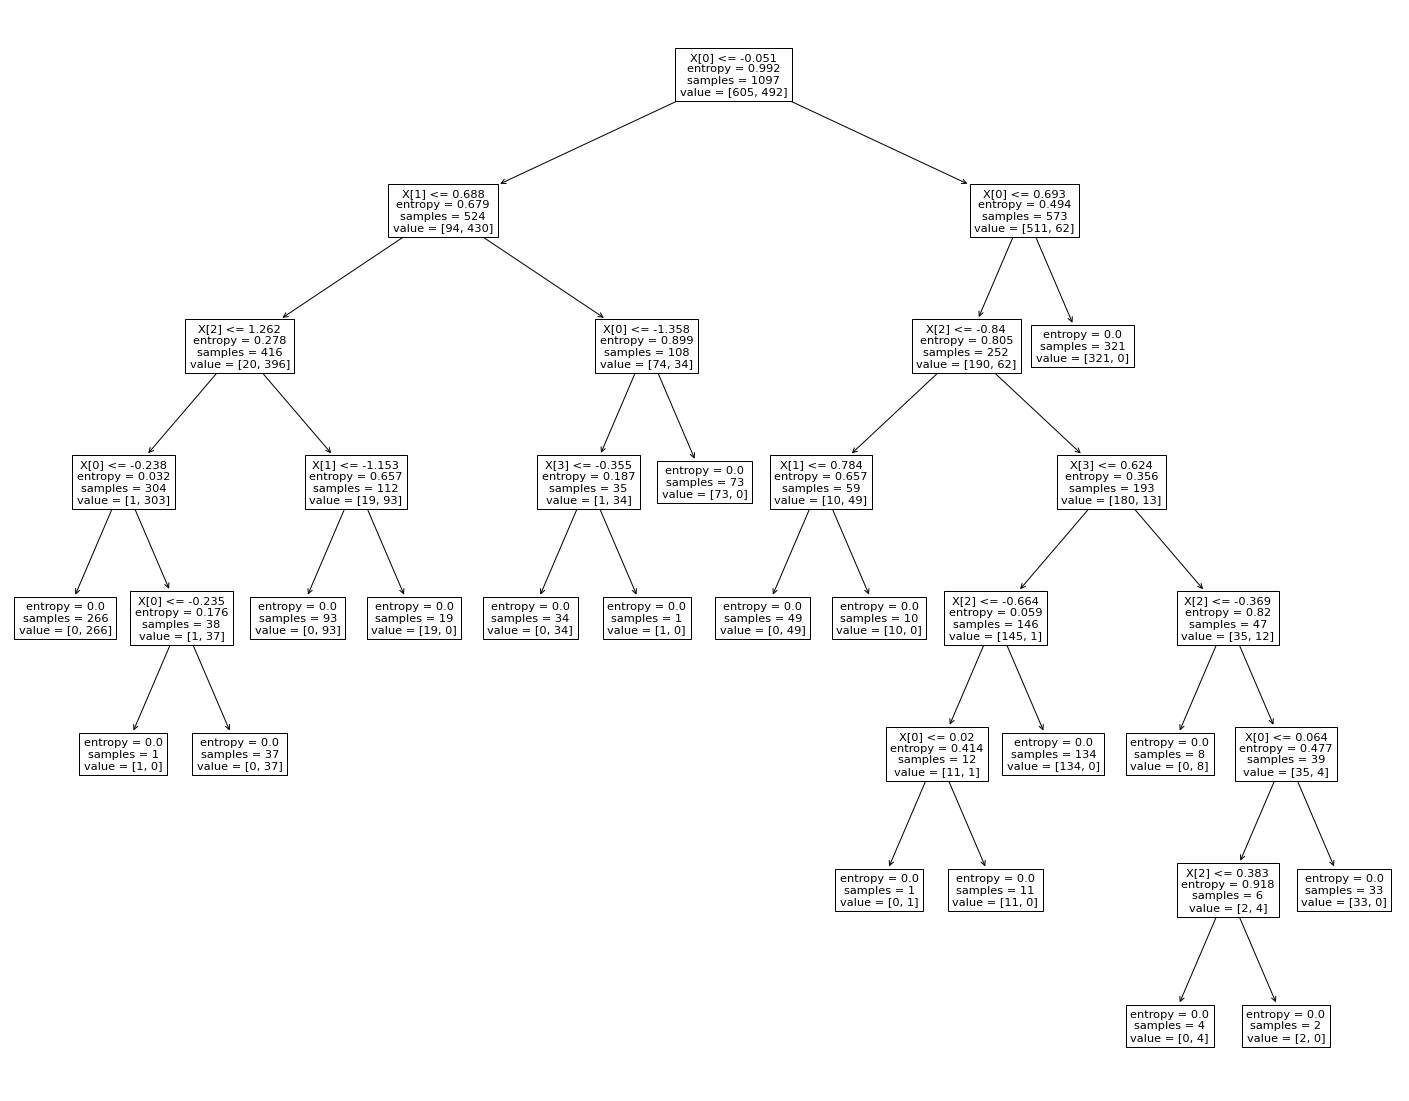

In [15]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(classifier)